## Random sample imputation



Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can then be used for machine learning.

Random sampling imputation is in principle similar to mean, median, and mode imputation in that it considers that missing values should look like those already existing in the distribution.

Random sampling consists of taking random observations from the pool of available data and using them to replace the NA. In random sample imputation, we take as many random observations as missing values exist in the variable.

In both numerical and categorical variables, the distribution of the variable is preserved by sampling observations at random to replace missing data. 

### Which variables can I impute by random sample imputation?

Random Sample Imputation can be applied to both numerical and categorical variables.

### Assumptions

Random sample imputation assumes that the data is missing completely at random. In this scenario, it makes sense to substitute the missing values with values extracted at random from the original distribution. 

From a probabilistic point of view, values that are more frequent, like the mean or the median or the most frequent category, will be selected more often (because there are more of them to select from), but less frequent values will be selected as well. Thus, the distribution of the variables is preserved. 

In essence, we replace a population of missing values with a population of values with the same distribution of the original variable.

### Advantages

- Preserves the variable distribution

### Limitations

- Randomness

- The relationship of imputed variables with other variables may be affected

- Computationally more expensive than previous methods

- Memory heavy, as we need to keep a copy of the training set, to extract values to replace the NA.


### When to use Random Sample Imputation?

- Data is missing completely at random

- No more than 5% of the variables contain missing data.

- Well suited for linear models as it does not distort the distribution, regardless of the percentage of NA

It is a good idea to use this method in combination with adding missing indicators.

#### Randomness

Randomness is not trivial. With this imputation procedure, we run the risk of executing the same feature engineering pipeline multiple times and obtaining different results.

Imagine, for example, a car manufacturer is trying to predict how long a certain car will be in the garage before it passes all the security tests. Today, they received a car with missing data in some of the variables. They ran the machine learning model to predict how long this car would stay in the garage. The model replaces missing values by a random sample and then produces an estimate of time. Tomorrow, when they run the same model on the same car, the model will randomly assign values to the missing data that may or may not be the same as the ones it selected today. Therefore, the final estimation of time in the garage, may or may not be the same as the one obtained the day before.

In addition, imagine the car manufacturer evaluating two different cars that have exactly the same values for all of the variables, and missing values in exactly the same subset of variables. They run the machine learning model for each car, and because the missing data is randomly filled with values, the 2 cars, that are exactly the same, may end up with different estimates of time in the garage.

This may sound completely trivial and unimportant. However, businesses must certain regulations, and some of them require the same treatment to be provided in the same situation. So if instead of cars, these were people applying for a loan, or people seeking disease treatment, the machine learning model would provide different solutions to candidates that are in the same conditions. And this is not fair or acceptable. This behavior needs to be avoided.

#### So, should we randomly replace NA or not?

It is still possible to replace missing data by a random sample, but this randomness needs to be controlled so that individuals in the same situation end up with the same scores and, therefore, with the same solutions offered. How can we ensure this? by appropriately setting seeds during the random extraction of values.

Finally, a disadvantage of random sampling, similar to the use of the mean and median, is that estimations of covariance and correlations with other variables in the dataset may be distorted, especially if there are many missing observations. 

### Final note

Replacement of missing values by a random sample, although similar in concept to replacement by the median or mean, is not as widely used in the data science community as the mean/median imputation, presumably because of the element of randomness, or because the code implementation is not so straightforward.

However, it is a valid approach, with clear advantages over mean or median imputation, as it preserves the distribution of the variable. And, especially for linear models, if you are aware of the element of randomness and account for it in some way, this may be the approach of choice. 

## In this demo:

We will learn how to perform random sample imputation using pandas on the Ames House Price and Titanic datasets.

- To download the datasets, please refer to the lecture **Datasets** in **Section 2** of this course.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# to split and standarise the datasets
from sklearn.model_selection import train_test_split

## Random Sampling for Numerical Variables

In [2]:
# load the Titanic Dataset with a few variables for demonstration

data = pd.read_csv("../../Datasets/titanic.csv", usecols=["age", "fare", "survived"])
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [3]:
# let's look at the percentage of NA

data.isnull().mean()

survived    0.000000
age         0.200917
fare        0.000764
dtype: float64

### Imputation important

Imputation should done over the training set, and then propagated to the test set. This means that the random sample to be used to fill missing values both in train and test set, should be extracted from the train set.

In [4]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.survived,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((916, 3), (393, 3))

In [5]:
# let's impute Age by random sampling both in
# train and test sets

# create the new variable where NA will be imputed:
# make a copy from the original variable, with NA
X_train["Age_imputed"] = X_train["age"].copy()
X_test["Age_imputed"] = X_test["age"].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = (
    X_train["age"].dropna().sample(X_train["age"].isnull().sum(), random_state=0)
)

random_sample_test = (
    X_train["age"].dropna().sample(X_test["age"].isnull().sum(), random_state=0)
)

# what is all of the above code doing?

# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['Age'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train["age"].isnull()].index
random_sample_test.index = X_test[X_test["age"].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train["age"].isnull(), "Age_imputed"] = random_sample_train
X_test.loc[X_test["age"].isnull(), "Age_imputed"] = random_sample_test

In [6]:
# check that NA were imputed
X_train["Age_imputed"].isnull().sum()

np.int64(0)

In [7]:
# check that NA were imputed
X_test["Age_imputed"].isnull().sum()

np.int64(0)

In [8]:
X_train.head(15)

,survived,age,fare,Age_imputed
501,1,13.0,19.5000,13.0
588,1,4.0,23.0000,4.0
402,1,30.0,13.8583,30.0
1193,0,NaN,7.7250,40.5
686,1,22.0,7.7250,22.0
971,0,NaN,7.8792,39.0
117,1,30.0,56.9292,30.0
540,1,2.0,26.0000,2.0
294,0,49.0,110.8833,49.0
261,1,35.0,26.2875,35.0


We can see how NAs are replaced by different values in the different rows! This is what we wanted.

#### Random sampling preserves the original distribution of the variable

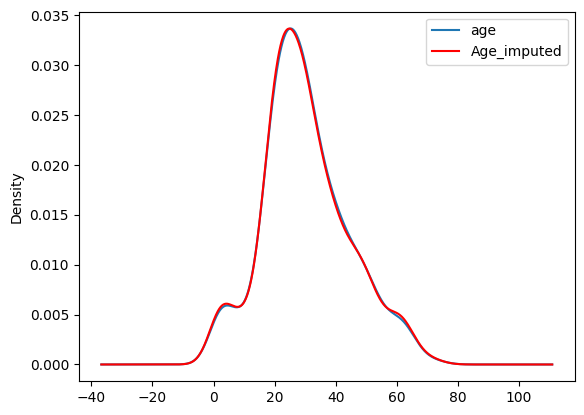

In [9]:
# we can see that the distribution of the variable after
# random sample imputation is almost exactly the same as the original

fig = plt.figure()
ax = fig.add_subplot(111)

X_train["age"].plot(kind="kde", ax=ax)
X_train["Age_imputed"].plot(kind="kde", ax=ax, color="red")

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

We can see that replacing missing values with a random sample from the training set preserves the original distribution of the variable. If you remember from previous notebooks, every other imputation technique altered the distribution of Age, because the percentage of NA in Age is high, ~20%. However, random sample imputation preserves the distribution, even in those cases. So this imputation technique is quite handy, if we are building linear models and we don't want to distort normal distributions.

As we used values within the original distribution to replace the NA, the distribution is preserved.

In [10]:
# there is some change in the variance of the variable.
# however this change is much smaller compared to mean or median
# imputation (check the previous notebook for comparison)

print("Original variable variance: ", X_train["age"].var())
print("Variance after random imputation: ", X_train["Age_imputed"].var())

# the variance is also preserved in the test set

Original variable variance:  194.16304666581863
Variance after random imputation:  198.53703762759557


In [11]:
# the covariance of Age with Fare is also less affected by this
# imputation technique compared to mean or median imputation

X_train[["fare", "age", "Age_imputed"]].cov()

,fare,age,Age_imputed
fare,2248.326729,136.176223,100.938070
age,136.176223,194.163047,194.163047
Age_imputed,100.938070,194.163047,198.537038


<Axes: >

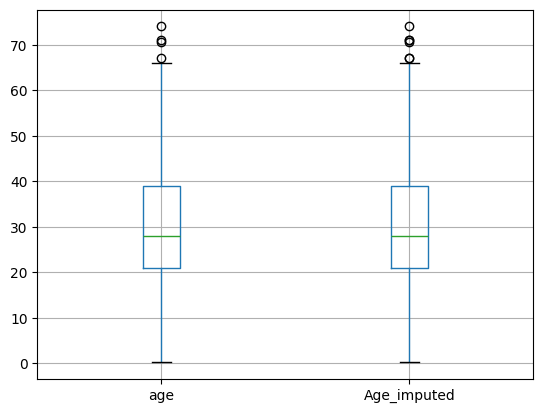

In [12]:
# Finally, the outliers are also less affected by this imputation
# technique

# Let's find out using a boxplot
X_train[["age", "Age_imputed"]].boxplot()

#minimal effect on the outliers. So, outliers didn't change much

So, random sample imputation offers all the advantages provided by the preservation of the original distribution. And that is a big plus, particularly, if you care about distribution and outliers for your machine learning models. This is particularly relevant for linear models. but not so important for tree based algorithms.

## Randomness can lead to different scores being assigned to the same observation

Let's examine the effect of randomness on multiple scoring, and how we can mitigate this behaviour, as this is very important when putting our models in production / integrating our models with live systems.

In [13]:
# let's pick one observation with NA in Age in this case we pick observation indexed 15

observation = data[data.age.isnull()].head(1)
observation

,survived,age,fare
15,0,NaN,25.925


In [14]:
# and now let's fill that NA with a random value
# extracted from the same variable where observations are available

# extract a random value, just 1
sampled_value = X_train["age"].dropna().sample(1)
""" 
X_train["age"] → selects the age column from your DataFrame.

.dropna() → removes any missing values (NaN) from that column.

.sample(1) → randomly picks 1 row (1 value) from the remaining data."""

# re index to 15
sampled_value.index = [15]  # pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation["Age_random"] = sampled_value

observation


"""This is what is done here
- You took a random value from the age column of X_train (ignoring any NaNs).

- You changed its index to 15 so it aligns with the row in your observation DataFrame that you want to fill.

- You assigned it to a new column Age_random in observation, so now that row shows the sampled age.
"""

'This is what is done here\n- You took a random value from the age column of X_train (ignoring any NaNs).\n\n- You changed its index to 15 so it aligns with the row in your observation DataFrame that you want to fill.\n\n- You assigned it to a new column Age_random in observation, so now that row shows the sampled age.\n'

In [15]:
# let's repeat the exercise again:
# we fill the NA with another random extracted value

# extract a random value, just 1
sampled_value = X_train["age"].dropna().sample(1)

# re index to 15
sampled_value.index = [15]  # pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation["Age_random"] = sampled_value

observation

# Note : the Age_random variable changes every time we run the sampling code,

,survived,age,fare,Age_random
15,0,NaN,25.925,25.0


In [16]:
# Doing this again!!


# extract a random value, just 1
sampled_value = X_train["age"].dropna().sample(1)

# re index to 15
sampled_value.index = [15]  # pandas needs the same index to be able to merge

# replace the NA with the sampled value
observation["Age_random"] = sampled_value

observation

# Note : the Age_random variable changes every time we run the sampling code,

,survived,age,fare,Age_random
15,0,NaN,25.925,26.0


We can see that every time we repeat the operation, we get a different value replacement for exactly the same observation. In fact, if we repeat the process 1000 times:

Text(0, 0.5, 'Number of times')

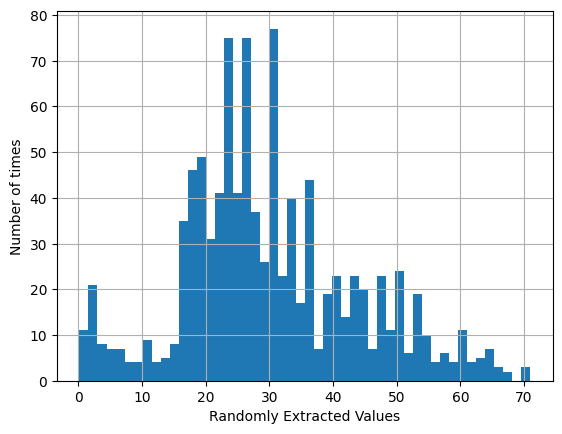

In [17]:
# if we repeat the process 1000 times!!!

values_ls = []

# capture the non-Na values to speed
# the computation
tmp = X_train.age.dropna()

for i in range(1000):

    # extract a random value, just 1
    sampled_value = tmp.sample(1).values

    # add the extracted value to the list
    values_ls.append(float(sampled_value[0]))

pd.Series(values_ls).hist(bins=50)
plt.xlabel("Randomly Extracted Values")
plt.ylabel("Number of times")

We obtain very different values for the same observation. Note how the distribution of extracted values is similar to the distribution of age.

If these were patients looking for treatment, every time we ran a predictive model, which would operate on the differently randomly extracted values, we would assign patients with the same characteristics to different treatments, and this is not OK.

### How can we fix this behaviour?

We can fix this randomness by assigning a seed:

In [18]:
values_ls = []

for i in range(100):

    # extract a random value, just 1, now with seed
    sampled_value = X_train.age.dropna().sample(1, random_state=10)
    """.sample(1) picks one random value from X_train["age"] (excluding NaNs).
        
        The random number generator (RNG) determines a pseudo-random order of the rows (indices) in the column.
        Using random_state=10 gives a fixed “shuffling pattern” of the indices.
        For example, with random_state=10, the first value picked might be 23.5, followed by 73, 23, 14, ...

        Using random_state=0 gives a different deterministic order of the indices.
        For example, the first value picked might be 43, followed by 5, 22, 12, 53, ...
        """

    values_ls.append(float(sampled_value.iloc[0]))

# print the values
pd.Series(values_ls).unique()

array([23.5])

In [19]:
values_ls

[23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5,
 23.5]

Now that we set the seed, every randomly extracted value for that observation is the same.

However, if we set the same seed for every single observation, what would happen is that for every different observation, we would be filling the NA with exactly the same value (same seed == same random value extracted). This would be the equivalent to arbitrary value imputation!!!

We don't want that behaviour either.

Therefore, we want our seed to change observation per observation, but in a controlled manner, so that 2 observations that are exactly the same, receive the same imputed random values. But 2 observations that are different, receive different imputed random values.

### Controlling the element of randomness by varying the seed

We can attribute a different seed to each observation, and in fact, we can make this seed depend on an alternative variable of the same observation, thus, thinking in the Titanic dataset, if 2 passengers paid exactly the same Fare, they would get exactly the same probability of survival (when Age is missing).

In [20]:
# let's pick one observation with NA in Age
# in this case we pick observation indexed 15

observation = data[data.age.isnull()].head(1)
observation

#Assume here fare = 25.925 is paid by a person of unknown age. Again, you found another person who paid the same fare. 

# So, you think of same probability of living for the same 2 people. 

# So, the value age should be set similar for people paying same fare. If we now set the fare 25 as a seed, it will always generate same age for all persons paying fare 25.925.

,survived,age,fare
15,0,NaN,25.925


In [21]:
# the seed is now the Fare

int(observation.fare.iloc[0]) # setting seed as 25

25

In [22]:
# we assign the Fare as the seed in the random sample extraction

# this means that every time we have a person paying fare 25.925, we will extract the same age value

sampled_value = X_train.age.dropna().sample(1, random_state=int(observation.fare.iloc[0]))

sampled_value.index = [15]

observation["Age_random"] = sampled_value
observation

,survived,age,fare,Age_random
15,0,NaN,25.925,44.0


In [23]:
# for a different observation with a different Fare,
# we would get a different randomly extracted value

observation = data[data.age.isnull()].tail(1)

observation

# here the age is also missing and the fare is 14.4542

# let's set age for all persons paying fare 14.4542

,survived,age,fare
1305,0,NaN,14.4542


In [24]:
# new seed
int(observation.fare.iloc[0]) # setting seed as 14

14

In [25]:
# we assign the Fare as the seed in the random sample extraction
sampled_value = X_train.age.dropna().sample(1, random_state=int(observation.fare.iloc[0]))

sampled_value.index = [1305]

observation["Age_random"] = sampled_value
observation

# so, the age is consistent for all persons paying the same fare

,survived,age,fare,Age_random
1305,0,NaN,14.4542,40.0


This is a way of controlling the randomness. Using the fare to set the random state, you guarantee that for 2 passengers with an equal fare, the age will be replaced with the same number, and therefore, the 2 passengers will get the same probability of survival.

### Note!!

In real life, you will build models that use tens of variables or more. So, in cases like that, you can think of picking the 3-5 most important variables, those that have the strongest impact on the output of the machine learning model, and combining them to create the random state. Therefore, customers that share the 3-5 main variable values, will get the same scores.

## Random Sampling for Categorical Variables

In [26]:
# let's load the dataset with a few columns for the demonstration
cols_to_use = ["BsmtQual", "FireplaceQu", "SalePrice"]

data = pd.read_csv("../../Datasets/houseprice.csv", usecols=cols_to_use)

# let's inspect the percentage of missing values in each variable
data.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
FireplaceQu    0.472603
dtype: float64

In [27]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data,
    data.SalePrice,
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 3), (438, 3))

In [28]:
# let's impute BsmtQual by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train["BsmtQual_imputed"] = X_train["BsmtQual"].copy()
X_test["BsmtQual_imputed"] = X_test["BsmtQual"].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = (
    X_train["BsmtQual"]
    .dropna()
    .sample(X_train["BsmtQual"].isnull().sum(), random_state=0)
)

random_sample_test = (
    X_train["BsmtQual"]
    .dropna()
    .sample(X_test["BsmtQual"].isnull().sum(), random_state=0)
)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['BsmtQual'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train["BsmtQual"].isnull()].index
random_sample_test.index = X_test[X_test["BsmtQual"].isnull()].index

# replace the NA in the newly created variable
X_train.loc[X_train["BsmtQual"].isnull(), "BsmtQual_imputed"] = random_sample_train
X_test.loc[X_test["BsmtQual"].isnull(), "BsmtQual_imputed"] = random_sample_test

In [29]:
# let's impute FireplaceQu by random sampling both in
# train and test sets

# create the new variable where NA will be imputed
# make a copy from the original variable, with NA
X_train["FireplaceQu_imputed"] = X_train["FireplaceQu"].copy()
X_test["FireplaceQu_imputed"] = X_test["FireplaceQu"].copy()

# extract the random sample to fill the na:
# remember we do this always from the train set, and we use
# these to fill both train and test

random_sample_train = (
    X_train["FireplaceQu"]
    .dropna()
    .sample(X_train["FireplaceQu"].isnull().sum(), random_state=0)
)

random_sample_test = (
    X_train["FireplaceQu"]
    .dropna()
    .sample(X_test["FireplaceQu"].isnull().sum(), random_state=0)
)

# what is all of the above code doing?
# 1) dropna() removes the NA from the original variable, this
# means that I will randomly extract existing values and not NAs

# 2) sample() is the method that will do the random sampling

# 3) X_train['FireplaceQu'].isnull().sum() is the number of random values to extract
# I want to extract as many values as NAs are present in the original variable

# 4) random_state sets the seed for reproducibility, so that I extract
# always the same random values, every time I run this notebook

# pandas needs to have the same index in order to merge datasets
random_sample_train.index = X_train[X_train["FireplaceQu"].isnull()].index
random_sample_test.index = X_test[X_test["FireplaceQu"].isnull()].index

# replace the NA in the newly created variable
X_train.loc[
    X_train["FireplaceQu"].isnull(), "FireplaceQu_imputed"
] = random_sample_train
X_test.loc[X_test["FireplaceQu"].isnull(), "FireplaceQu_imputed"] = random_sample_test

In [30]:
# check that nulls were removed
X_train["FireplaceQu_imputed"].isnull().sum()

np.int64(0)

In [31]:
# and now let's evaluate the effect of the imputation on the distribution
# of the categories and the target within those categories

# we used a similar function in the notebook of arbitrary value imputation
# for categorical variables


def categorical_distribution(df, variable_original, variable_imputed):

    tmp = pd.concat(
        [
            # percentage of observations per category, original variable
            df[variable_original].value_counts(normalize=True),
            # percentage of observations per category, imputed variable
            df[variable_imputed].value_counts(normalize=True),
        ],
        axis=1,
    )

    # add column names
    tmp.columns = ["original", "imputed"]

    return tmp

In [32]:
# run the function in a categorical variable
categorical_distribution(X_train, "BsmtQual", "BsmtQual_imputed") #distribution remains almost same before and after for BsmtQual variable

,original,imputed
TA,0.463928,0.465753
Gd,0.430862,0.428571
Ex,0.082164,0.083170
Fa,0.023046,0.022505


In [33]:
# run the function in a categorical variable
categorical_distribution(X_train, "FireplaceQu", "FireplaceQu_imputed") #distribution remains almost same before and after for FireplaceQu variable

,original,imputed
Gd,0.468750,0.469667
TA,0.420956,0.420744
Fa,0.047794,0.046967
Ex,0.033088,0.032290
Po,0.029412,0.030333


As expected, the percentage of observations within each category is very similar in the original and imputed variables, for both BsmtQual where NA is low and FireplaceQu where NA is high.

In [34]:
# now let's look at the distribution of the target within each
# variable category


def automate_plot(df, variable, target):

    fig = plt.figure()
    ax = fig.add_subplot(111)

    for category in df[variable].dropna().unique():
        df[df[variable] == category][target].plot(kind="kde", ax=ax)

    # add the legend
    lines, labels = ax.get_legend_handles_labels()
    labels = df[variable].dropna().unique()
    ax.legend(lines, labels, loc="best")

    plt.show()

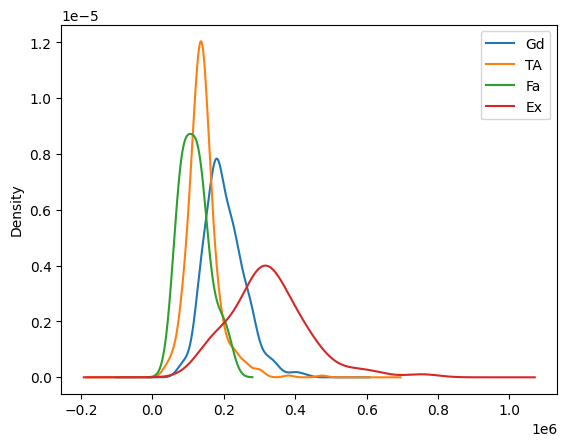

In [35]:
automate_plot(X_train, "BsmtQual", "SalePrice")

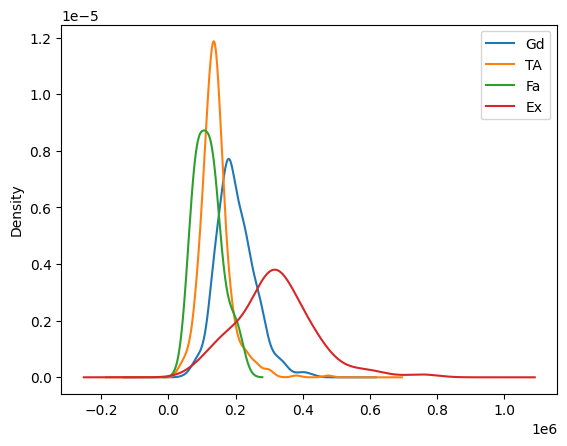

In [36]:
automate_plot(X_train, "BsmtQual_imputed", "SalePrice")

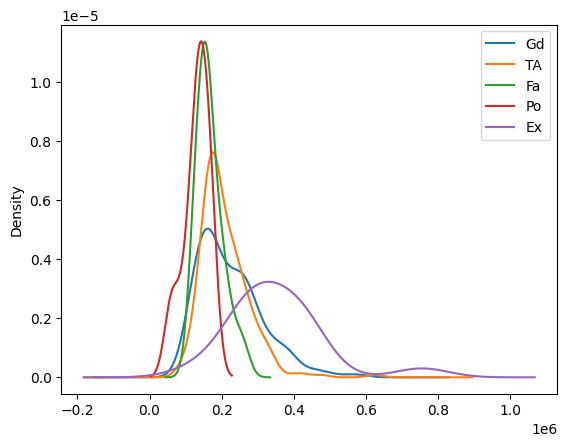

In [37]:
automate_plot(X_train, "FireplaceQu", "SalePrice")

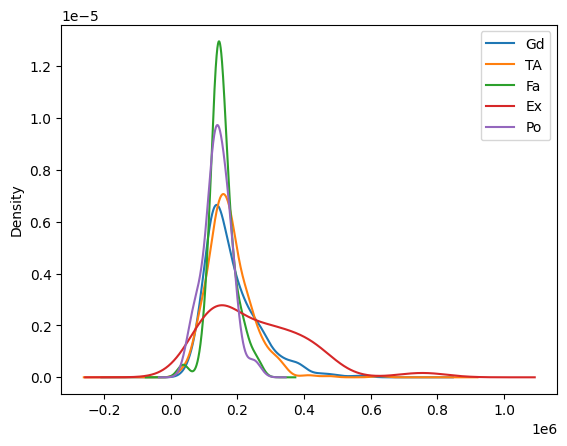

In [38]:
automate_plot(X_train, "FireplaceQu_imputed", "SalePrice")

For BsmtQual, where the NA is low, the distribution of the target is preserved for the categories in the original and imputed variable. 

The distribution of the target per category is slightly modified in FireplaceQu, which has more NAs in the dataset. 

## Note on Random Sample Imputation code

The code provided in this notebook for random sampling is a bit complex. Don't worry! You can do random sample imputation using the package Feature-engine in just a couple of lines. I will show you how in a coming notebook.
